In [176]:
#notebook-wide imports
import sys
import numpy as np
import pandas as pd

#custom libraries
sys.path.append("/cluster/bh0085/mylib")

#allows import of ipnb notebooks in dev mode
import ipnb_utils

#pipeline configuration
import _config
reload (_config)
from _config import SHE2901_FQ_FILES, SHE2955_FQ_FILES, EXP_DESIGN_2955, EXP_DESIGN_2901, OLIGO_LIBRARY


importing Jupyter notebook from _config.ipynb


In [ ]:
#scan the fastq file for reads
#OUTPUT
#  matched_reads -- a list of all matched forward reads
#  qualities -- quality scores for all matched reads
num_tot = 0
num_bad_q = 0
matched_reads = []
qualities = []

#loop over all files (R1 only)
for fpath in SHE2901_FQ_FILES:
  with open(fpath) as f:
    print f
    for i, line in enumerate(f):
          if i % 1e6 == 0: print i
          if i % 4 == 0:
            header = line.strip()
          if i % 4 == 1:
            read = line.strip()
          if i % 4 == 3:
            num_tot += 1
            qs = line.strip()
            quals = [ord(s)-33 for s in qs]
            #if np.mean(quals) < 30:
            #  num_bad_q += 1
            #  continue
            #store all homologous reads matching quality threshold
            if "TAGAGCATGCACCG" in read:
                  qualities.append(quals)
                  matched_reads.append(read) 

In [ ]:
matched_reads_2 = []

oligos_buffer = 

for fpath in SHE2901_FQ_FILES:
  with open(fpath) as f:
    print f
    for i, line in enumerate(f):
          if i % 1e6 == 0: print i
          if i % 4 == 0:
            header = line.strip()
          if i % 4 == 1:
            read = line.strip()
          if i % 4 == 3:
            num_tot += 1
            qs = line.strip()
            quals = [ord(s)-33 for s in qs]
            #if np.mean(quals) < 30:
            #  num_bad_q += 1
            #  continue
            #store all homologous reads matching quality threshold
            if "GCTCTTCCGATCT" in read:
                  matched_reads_2.append(read) 

            try:
                offset = r.index("TGATCTAGAGCATGCACCGG")
            except ValueError,v:
                continue
                
            oligo_start = offset + len("TGATCTAGAGCATGCACCGG")
            oligo_seq = r[oligo_start:oligo_start+150]
            umi_start = len("TGGAGTTCAGACGTGTGCTCTTCCGATCT") + oligo_start + 150
            umi_seq = r[umi_start:umi_start + 15]


In [1]:
print len(matched_reads)
print len(matched_reads_2)

NameError: name 'matched_reads' is not defined

In [555]:
# brief analyss of matched reads.
# get a list of distinct oligos and umis

FULLPLASMID = "AATGATACGGCGACCACCGAGAACACTCTTTCCCTACACGACGCTCTTCCGATCTNNNNNNNTGATCTAGAGCATGCACCGG"+\
("N"*150)+"TGGAGTTCAGACGTGTGCTCTTCCGATCTNNNNNNNNNNNNNNN"+\
"TCGACGAATTCGGCCGGCCGCTTCGAGCAGACATGAGATCGGAAGAGCGGTTCAGCAGGAATGCCGAGACCGATCTCGTATGCCGTCTTCTGCTTG".upper()

oligos = set()
umis = set()
umi_oligos= dict()
oligo_distinct_umis = dict()

for r in matched_reads:
    try:
        offset = r.index("TGATCTAGAGCATGCACCGG")
    except ValueError,v:
        continue
    oligo_start = offset + len("TGATCTAGAGCATGCACCGG")
    oligo_seq = r[oligo_start:oligo_start+150]
    umi_start = len("TGGAGTTCAGACGTGTGCTCTTCCGATCT") + oligo_start + 150
    umi_seq = r[umi_start:umi_start + 15]
    
    umis.add(umi_seq)
    oligos.add(oligo_seq)
    umi_oligos[umi_seq] = umi_oligos.get(umi_seq,[]) + [oligo_seq]
    oset = oligo_distinct_umis.get(oligo_seq,set())
    oset.add(umi_seq)
    oligo_distinct_umis[oligo_seq] = oset
    
    

In [558]:
#BRIEF EXCURSION TO TEST HOW FREQUENTLY WE FIND THE PRE-UMI SEQUENCE

reads_df["umi_corrected"] = np.nan
notfound, different, same = 0,0,0
umis_2 = set()
oligo_distinct_umis2 = dict()


for r in matched_reads:
    try:
        offset = r.index("GAGCATGCACCGG")
    except ValueError,v:
        continue
    oligo_start = offset + len("GAGCATGCACCGG")
    oligo_seq = r[oligo_start:oligo_start+150]
    try:
        umi_start_2 = r.index("TCCGATCT") + len("TCCGATCT")
    except ValueError:
        notfound+=1
        continue
        
    umi_start = len("TGGAGTTCAGACGTGTGCTCTTCCGATCT") + oligo_start + 150
    
    if umi_start_2 != umi_start: 
        different+=1
    else:
        same += 1
    umi_seq = r[umi_start_2:umi_start_2 + 15]
    umis_2.add(umi_seq)
    reads_df.loc[oligo_seq,"umi_corrected"] = umi_seq
    
    oset = oligo_distinct_umis2.get(oligo_seq,set())
    oset.add(umi_seq)
    oligo_distinct_umis2[oligo_seq] = oset

    

In [527]:
len(reads_df["umi_corrected"].unique())

38942

In [ ]:
#longer analysis of matched reads
#note that since we didn't previously store and index matching oligos to matched reads, we have to re-extract them
#here, but acknowledging that the umis and oligos may not have been strictly in the right places


for r in matched_reads:
    try:
        offset = r.index("TGATCTAGAGCATGCACCGG")
    except ValueError,v:
        continue
    oligo_start = offset + len("TGATCTAGAGCATGCACCGG")
    oligo_seq = r[oligo_start:oligo_start+150]
    umi_start = len("TGGAGTTCAGACGTGTGCTCTTCCGATCT") + oligo_start + 150
    umi_seq = r[umi_start:umi_start + 15]
    
    

In [174]:
# write files for blast alignment
from Bio import SeqRecord, SeqIO, Seq

recs = []
for k,row in OLIGO_LIBRARY.iterrows():
    rec = SeqRecord.SeqRecord(seq = Seq.Seq(row["Oligo"].upper()), id="oligolib_{0}".format(k))
    recs.append(rec)
    
with open("../data/oligo_lib.fa","w") as f:
    SeqIO.write(recs,f,"fasta")
    
read_oligo_recs = []
for i, o in enumerate(list(oligos)):
    rec = SeqRecord.SeqRecord(seq = Seq.Seq(o), id="oligo_read{0}".format(i))
    read_oligo_recs.append(rec)

with open("../data/oligo_query.fa","w") as f:
    SeqIO.write(read_oligo_recs,f,"fasta")
                              
        



In [308]:
#read blast top alignment output
col_names =[e.strip() for e in "qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore".split(" ")]
blast = pd.read_csv("../data/blast.out.txt", names =col_names )


In [ ]:
read_oligo_seqs

In [343]:
#create a dataframe with blast information for all reads

read_oligo_seqs = [str(r.seq) for r in read_oligo_recs]

read_oligo_lib_lookup = {}
read_oligo_lib_sequences = {}
read_oligos_to_lib = {}
read_oligo_blast_sstart = {}
read_oligo_blast_send = {}
read_oligo_blast_key = {}

for i,row in blast.iterrows():
    read = read_oligo_seqs[int(re.compile("\d+").search(row["qseqid"]).group())]
    lib_el = int(re.compile("\d+").search(row["sseqid"]).group())
    lib_row = OLIGO_LIBRARY.loc[lib_el]
    read_oligo_lib_lookup[read] = lib_el
    read_oligo_lib_sequences[read] = lib_row["Oligo"]
    read_oligo_blast_key[read] = i
    read_oligo_blast_sstart[read] = row["sstart"]
    read_oligo_blast_send[read] = row["send"]
    
reads_df = pd.DataFrame()
reads_df["lib_key"] = pd.Series(read_oligo_lib_lookup)
reads_df["oligo_lib_seq"] = pd.Series(read_oligo_lib_sequences)
reads_df["blast_key"] = pd.Series(read_oligo_blast_key)
reads_df["blast_sstart"] = pd.Series(read_oligo_blast_sstart)
reads_df["blast_send"] = pd.Series(read_oligo_blast_send)
    

In [459]:
cnt = 1
num_bad = 0

umi_library_oligos = pd.DataFrame(index=pd.Series(list(umis)),columns=["oligo_seq","oligo_2_lib_score"])

for u,oligos in umi_oligos.iteritems():
    if not u: continue
        
    library_seqs = []
    for o in oligos:
        try:
            library_seq = reads_df.loc[o,"oligo_lib_seq"][25:175]
            blast_key = reads_df.loc[o,"blast_key"]
            blast_pident = blast.loc[blast_key,"pident"]
            blast_bitscore = blast.loc[blast_key,"bitscore"]
            blast_row = blast.loc[blast_key,:]
        except KeyError, e:
            num_bad += 1
            continue
        if blast_bitscore > 200 :
            library_seqs.append(library_seq)
            break
    if len(library_seqs) > 1:
        num_bad += 1
        continue
    if len(library_seqs) == 1:
        umi_library_oligos.loc[u,"oligo_seq"] = library_seqs[0]
        umi_library_oligos.loc[u,"oligo_2_lib_score"] = blast_bitscore
    else:
        num_bad += 1

    cnt+=1


In [541]:
cnt = 1
num_bad = 0

umi_library_oligos_2 = pd.DataFrame(index=pd.Series(list(umis_2)),columns=["oligo_seq","oligo_2_lib_score"])

for k,row in reads_df.iterrows():
    if not row["umi_corrected"]:continue
    u = row["umi_corrected"]
    library_seqs = []
    for o in oligos:
        try:
            library_seq = reads_df.at[k,"oligo_lib_seq"][25:175]
            blast_key = reads_df.at[k,"blast_key"]
            blast_pident = blast.at[int(blast_key),"pident"]
            blast_bitscore = blast.at[int(blast_key),"bitscore"]
            blast_row = blast.loc[int(blast_key),:]
        except TypeError, e:
            num_bad += 1
            continue
        except KeyError, e:
            num_bad += 1
            continue
        if blast_bitscore > 200 :
            library_seqs.append(library_seq)
            break
    if len(library_seqs) > 1:
        num_bad += 1
        continue
    if len(library_seqs) == 1:
        umi_library_oligos_2.at[u,"oligo_seq"] = library_seqs[0]
        umi_library_oligos_2.at[u,"oligo_2_lib_score"] = blast_bitscore
    else:
        num_bad += 1

    cnt+=1


In [4]:
umi_library_oligos_2

notFound = 0

positive_controls = pd.read_csv("../data/starrseq_transcript_positive_control.csv")
positive_controls["barcode"] = ""
print positive_controls.columns
for k,r in positive_controls.iterrows():
    bcs = umi_library_oligos_2.loc[umi_library_oligos_2.oligo_seq == r.Sequence]
    
    if len(bcs) == 0:
        notFound+=1
        continue
    bc = ','.join(k for k,b in bcs.iterrows())
    positive_controls.at[k,"barcode"]= bc

NameError: name 'umi_library_oligos_2' is not defined

In [6]:
import pandas as pd
positive_controls = pd.read_csv("../data/starrseq_transcript_positive_control.csv")


In [653]:
positive_controls.to_csv("../data/SHE2901_positive_controls_barcoded.csv", index=False)

,oligo_seq,oligo_2_lib_score
,NaN,NaN
CCCTGTGTCGTTAAC,CCTGGGGCTGCCAGGGGCTGAAGTGTTGATGTTAACTGCCGGGATC...,263
GGCCACCGAAGCGCT,GCATGGTGATGGTTTCCCCACGTTTGAATCCCCAAGCCTCCTGGGA...,274
TGAATTATAGAAACT,TAGTTTACAATTATTAGATACACTGATGCATAGGAGGATGCAGGAC...,272
AATCCCATAAGCGAC,CAGGTCTACCTCTCAGCCGCTCCCAAGCCTGAGCTTGGTGACGGAG...,278
CCGTCCAAAAGTTAA,TCAAGTAGGCTCTTCCAGAAGGTTTTCCCTCCTGGGATGTCTGTGT...,278
AGAAACTTAATTACG,AAATAAACTAAGGGGCATTGGGAACACGCTCCTGCCACCTCCACAC...,272
AGTCCACTAAAGGAT,TTGGGGTGGGGGGGCGGGGCGGCAGGGGACGGAGTTTCACTCTTAT...,250
GGAGCGTTGTCCTTC,GCGGTCACTCTGAAGTGATGTAAGCCTCCTGTGTCCTAAGAGCAAC...,272
TTCCTGACCGCCCAA,NaN,NaN


In [652]:
np.mean(oligo_info.n_total_umis_corrected.values)

4.550777766769047

In [3]:
umi_library_oligos_2

NameError: name 'umi_library_oligos_2' is not defined

In [545]:
#import _config
#reload(_config)
# umi_library_oligos.to_csv(_config.UMI_OLIGO_DICT_FILE, )
umi_library_oligos_2.to_csv(_config.UMI_OLIGO_CORRECTED_DICT_FILE )

In [389]:
umis_out = pd.DataFrame()
umis_out["oligo"] = np.nan

for u,oligo_reads in umi_oligos.iteritems():
    print "HI"
    print u
    break

In [589]:

grped = reads_df.groupby("lib_key")

oligo_info = pd.DataFrame(OLIGO_LIBRARY.Oligo)

#oligo_info.index = pd.Series([i for i,r in OLIGO_LIBRARY.iterrows()])
oligo_info["n_distinct_observed"] = 0
oligo_info["avg_error"] = np.nan
oligo_info["n_total_umis"] = 0
oligo_info["n_total_umis_corrected"] = 0
oligo_info["n_distinct_umis"] = 0
oligo_info["n_distinct_umis_corrected"] = 0

matched = 0
diff = 0
#all_diffs = np.zeros(150)
cnt = -1
for name, group in grped:
    cnt+=1
    oligo_info.loc[name,"n_distinct_observed"] = len(group)
    umis = []
    umis2 = []
    
    for seq, row in group.iterrows():
        #diffs = np.zeros(150)
        if row["blast_send"] - row["blast_sstart"] == 149:
            matched += 1
            for i in range(150):
                if row["oligo_lib_seq"][i+int(row["blast_sstart"])-1] != seq[i]:
                    all_diffs[i]+=1
        umis += oligo_distinct_umis[seq]
        umis2 += oligo_distinct_umis2.get(seq,[])
        #print len(umis), len(umis2)
        
    oligo_info.at[name,"n_distinct_umis"] = len(set(umis))
    oligo_info.at[name,"n_distinct_umis_corrected"] = len(set(umis2))
    oligo_info.at[name,"n_total_umis_corrected"] = len(umis2)
    oligo_info.at[name,"n_total_umis"] = len(umis)
    
    if cnt %1000 == 0:
        print "{0} of {1}".format(cnt,len(grped))
    

0 of 9676
1000 of 9676
2000 of 9676
3000 of 9676
4000 of 9676
5000 of 9676
6000 of 9676
7000 of 9676
8000 of 9676
9000 of 9676


In [588]:
oligo_info

['ACAATCCCCGCCGAT', 'TCCCTCACCATTAAG']

In [670]:
#@RICH LIBRARY DIVERSITY
print len(umis_2)
print len(set(umis_2))

umis_full_list = [ e for e in reads_df.umi_corrected.values if type(e) ==str]
print len(umis_full_list)
print len(set(umis_full_list))

46664
46664
39006
38941


896


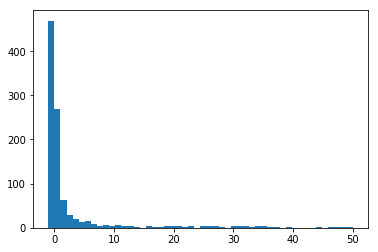

In [565]:
#@LIN ALIGNMENT QUALITY CHECKING
import Bio
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

indel_lengths = []
cnt = -1
for k,r in reads_df.iterrows():
    cnt+=1
    lib_seq = r["oligo_lib_seq"]
    read_seq = k    
    alignment =  pairwise2.align.globalms(k,lib_seq[25:175], 1, -1, -1, -.1)[0]
    #print alignment
    
    indel_lengths .append(alignment[0].count("-"))
    if cnt > 1000: break
        
plt.hist(indel_lengths,bins = np.linspace(-1,50,51))
print len([e for e in indel_lengths if e < 10])

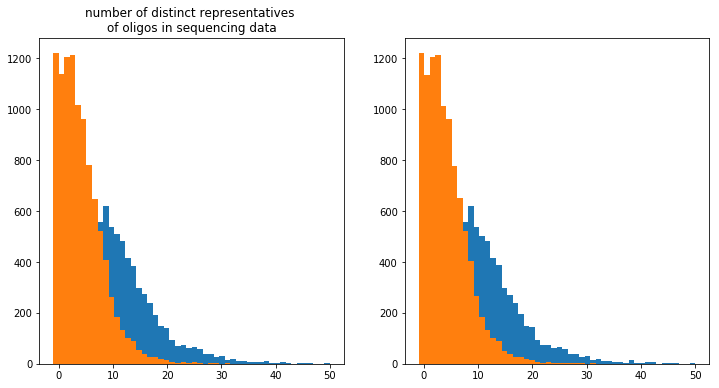

In [590]:
#@LIN NUMBER OF DISTINCT REPRESENTATIVES AND TOTAL REPRESENTATIVES OF UMIS
f, subs = plt.subplots(1,2)

f.set_size_inches([12,6])
ax = subs[0]
bins = np.linspace(-1,50,51)
ax.set_title("number of distinct representatives \nof oligos in sequencing data")
h1 = ax.hist([r.n_distinct_umis for i,r in oligo_info.iterrows()],bins = bins)
h2 = ax.hist([r.n_distinct_umis_corrected for i,r in oligo_info.iterrows()],bins = bins)

ax2 = subs[1]
h1 = ax2.hist([r.n_total_umis for i,r in oligo_info.iterrows()],bins = bins)
h2 = ax2.hist([r.n_total_umis_corrected for i,r in oligo_info.iterrows()],bins = bins)

ax2 = subs[1]


In [615]:
print "number of oligos observed in SHE2901: ", len(reads_df)
print "number of oligos mapped to library oligos:", len(reads_df.loc[reads_df["lib_key"] >0 ])
print "number of oligos in library: ", len(OLIGO_LIBRARY)
print "number of library oligos in SHE2901: ", len(reads_df.groupby(reads_df["lib_key"]))

print "num oligos matched to barcodes: ", len(reads_df.loc[reads_df["umi_corrected"] >0])
print "number of distinct barcode / oligo pairs", len(reads_df.groupby("umi_corrected"))




number of oligos observed in SHE2901:  84528
number of oligos mapped to library oligos: 83743
number of oligos in library:  10093
number of library oligos in SHE2901:  9676
num oligos matched to barcodes:  39006
number of distinct barcode / oligo pairs 38941


In [ ]:
bins = np.linspace(0,200,200)

fig, subs = plt.subplots(1,2)

subs[0].hist( reads_df["blast_send"] - reads_df["blast_sstart"], bins = bins)
subs[0].title = "oligo read alignment length to reference lib"

#check the averages of read identity to understand whether the above mismatch counts are correct
brow = row["blast_key"]
subs[1].hist( [blast.loc[row["blast_key"]]["pident"] for i,row in reads_df.iterrows()])
#print min (reads_df["blast_send"] - reads_df["blast_sstart"])
#print len( reads_df.loc[reads_df["blast_send"] - reads_df["blast_sstart"]==149])
#print len(reads_df)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(all_diffs)
print sum(all_diffs)
print 20 * 34893
print matched

plt.plot()

NameError: name 'all_diffs' is not defined